### Este notebook exemplo utiliza [markdown](https://github.com/adam-p/markdown-here/wiki/Markdown-Cheatsheet) para formatação do texto, e [LaTeX](https://en.wikibooks.org/wiki/LaTeX/Mathematics) para criação de fórmulas matemáticas.

O salário inicial médio estimado dos alunos é significativamente
superior ao salário inicial real dos cursos de farmácia?

- Sabe se que a distribuição dos salários iniciais dos formandos em
farmácia é normalmente distribuı́da com uma média $\mu = 3000$ por
mês;
- Salários iniciais mensais esperados de 15 alunos: 3500, 4200, 2500,
3200, 2700, 2000, 2500, 4100, 5000, 4200, 2900, 3900, 4000, 5000 e
5500;
- Média amostral de $\bar{x} = 3680$.

Optamos por um teste unilateral. Também escolhemos um $\alpha = 0.05$.

**1** - Estabelecer as hipóóteses nula e alternativa:

$H_0: \mu_{farma} = 3000;$

$H_a: \mu_{quiz} > 3000.$

**2** - Definir a forma da região crítica, com base na hipótese alternativa.

$RC = \{ t \in R \mid t > t_c\}$

Depois de saber o tamanho da amostra de um estudo, você precisa
calcular seus graus de liberdade (gl). Para o teste t de amostra única, a fórmula para o gl é gl = N - 1. Portanto, neste caso,

$gl = 15 − 1 = 14$

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

gls = [13, 14, 15]
a05 = [round(-stats.t(x).ppf(0.05), 4) for x in gls]
a01 = [round(-stats.t(x).ppf(0.01), 4) for x in gls]

df = pd.DataFrame(zip(gls, a05, a01), columns=['gl', r'$\alpha = .05$', r'$\alpha = .01$'])

color = (df.iloc[:,1] == df.loc[1,r'$\alpha = .05$']).map({True: 'background-color: yellow', False: ''})

df.style.apply(lambda s: color)

,gl,$\alpha = .05$,$\alpha = .01$
0,13,1.770900,2.650300
1,14,1.761300,2.624500
2,15,1.753100,2.602500


Text(0.5, 1.0, 'Distribuição t com área acima de 1.76.')

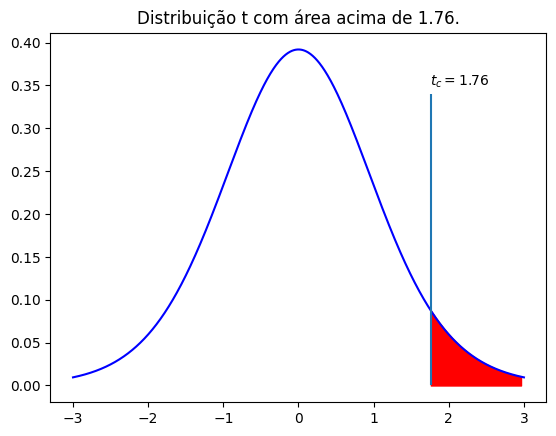

In [4]:
# simular valores dentro da distribuição normal N(0,1)
import matplotlib.pyplot as plt

x=np.linspace(0-3*1, 0+3*1,1000)

T = stats.t(14)
plt.plot(x, T.pdf(x), color='b')

tc = 1.7613
#tobs = 2.54

px=np.arange(tc,0+3*1,0.1)
plt.fill_between(px, T.pdf(px),color='r')
#px=np.arange(tobs,0+3*1,0.1)
#plt.fill_between(px, T.pdf(px),color='b')
plt.text(1.75, 0.35, r'$t_c=1.76$')
plt.vlines(1.76, 0, 0.34)
#plt.text(2.3, 0.30, r'$t_{obs}=2.54$')
#plt.vlines(2.54, 0, 0.29)
plt.title('Distribuição t com área acima de 1.76.')

**3** - Identificar a distribuição do estimador e obter sua estimativa.

_a. Calcule o desvio observado entre a média amostral e a média da população_
Encontre o desvio entre a média amostral e a média populacional.

$\bar{x} - \mu = 3680 − 3000 = 680$

_b. Calcule o desvio esperado devido ao erro de amostragem_
Calcule a quantidade esperada de erro amostral dado o tamanho da amostra.
                                        
$SEM_a = \frac{\sigma}{\sqrt{N}} = \frac{1038.680}{\sqrt{15}} = 268.186$

Neste caso, o erro padrão da média é 268.186. Isso significa que quando N = 15, a distância típica que todas a médias amostrais possíveis estão da média populacional é 268.186. Esta é a quantidade de desvio que esperamos entre qualquer média amostral e a média da população devido ao erro amostral (ou seja, a diferença esperada pelo acaso).

_c. Calcule o t para uma média amostral_
Calcule o escore z obtido associado à média amostral obtida.

$t = \frac{(\bar{x} - \mu)}{SEM_a} = 2.54$

In [10]:
import numpy

x = np.array([3500, 4200, 2500, 3200, 2700, 2000, 2500, 4100, 5000, 4200, 2900, 3900, 4000, 5000, 5500])
x_media = x.mean()
n = len(x)
x_media

3680.0

In [7]:
x-x_media

array([ -180.,   520., -1180.,  -480.,  -980., -1680., -1180.,   420.,
        1320.,   520.,  -780.,   220.,   320.,  1320.,  1820.])

In [9]:
(x-x_media)**2

array([  32400.,  270400., 1392400.,  230400.,  960400., 2822400.,
       1392400.,  176400., 1742400.,  270400.,  608400.,   48400.,
        102400., 1742400., 3312400.])

In [12]:
var_x = ((x-x_media)**2).sum()/(n-1)
var_x

1078857.142857143

In [13]:
tobs = (x_media-3000)/np.sqrt(var_x/n)
tobs

2.5355522916573445

**4** - Fixar o $\alpha$ e obter a região críítica.


$P(Z > z_c) = 0.05$

In [14]:
# https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
from scipy import stats
T = stats.t(14)
print(r'$t_c$:', T.ppf(0.95))

$t_c$: 1.7613101357748562


**5** - Concluir o teste com base na estimativa e na região crítica.

$t_{obs} \in RC$

### Importante: o p-valor muito provavelmente não é igual a zero, esse valor geralemente é obtido quando a biblioteca tem uma limitação na aproximação de valores muito pequenos. É comum, em caso de não ter acesso a métodos de cálculo preciso, reportar $p-valor < 0.05$, por exemplo.

In [15]:
print('pvalue=', 1-T.cdf(2.54))

pvalue= 0.01178496547038188
